In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [3]:
df_all = pd.read_csv("prosperLoanData.csv")
df_all

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Select features related to Loan Status

In [5]:
df_selected = df_all[["CreditGrade","Term", "BorrowerAPR", "BorrowerRate", "ProsperRating (numeric)", "ProsperScore", "EmploymentStatus", 
                  "IsBorrowerHomeowner", "CurrentlyInGroup","LoanOriginalAmount", "StatedMonthlyIncome", "Recommendations", "LoanStatus" ]]
df_selected

,CreditGrade,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,LoanOriginalAmount,StatedMonthlyIncome,Recommendations,LoanStatus
0,C,36,0.16516,0.1580,NaN,NaN,Self-employed,True,True,9425,3083.333333,0,Completed
1,NaN,36,0.12016,0.0920,6.0,7.0,Employed,False,False,10000,6125.000000,0,Current
2,HR,36,0.28269,0.2750,NaN,NaN,Not available,False,True,3001,2083.333333,0,Completed
3,NaN,36,0.12528,0.0974,6.0,9.0,Employed,True,False,10000,2875.000000,0,Current
4,NaN,36,0.24614,0.2085,3.0,4.0,Employed,True,False,15000,9583.333333,0,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,NaN,36,0.22354,0.1864,4.0,5.0,Employed,True,False,10000,4333.333333,0,Current
113933,NaN,36,0.13220,0.1110,6.0,8.0,Employed,True,False,2000,8041.666667,0,FinalPaymentInProgress
113934,NaN,60,0.23984,0.2150,3.0,3.0,Employed,True,False,10000,2875.000000,0,Current
113935,NaN,60,0.28408,0.2605,4.0,5.0,Full-time,True,False,15000,3875.000000,0,Completed


In [6]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CreditGrade              28953 non-null   object 
 1   Term                     113937 non-null  int64  
 2   BorrowerAPR              113912 non-null  float64
 3   BorrowerRate             113937 non-null  float64
 4   ProsperRating (numeric)  84853 non-null   float64
 5   ProsperScore             84853 non-null   float64
 6   EmploymentStatus         111682 non-null  object 
 7   IsBorrowerHomeowner      113937 non-null  bool   
 8   CurrentlyInGroup         113937 non-null  bool   
 9   LoanOriginalAmount       113937 non-null  int64  
 10  StatedMonthlyIncome      113937 non-null  float64
 11  Recommendations          113937 non-null  int64  
 12  LoanStatus               113937 non-null  object 
dtypes: bool(2), float64(5), int64(3), object(3)
memory usage: 9

# Convert Multi class to Binary Class

In [7]:
df_selected["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [8]:
df_selected["LoanStatus"].replace(to_replace=["Current", "Completed", "FinalPaymentInProgress"], value=0, inplace=True)

df_selected["LoanStatus"].replace(to_replace=["Chargedoff", "Defaulted", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", 
                       "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)","Cancelled"], 
           value=1, inplace=True)

In [9]:
df_selected["LoanStatus"].value_counts()

0    94855
1    19082
Name: LoanStatus, dtype: int64

# Treat Missing Values

In [10]:
import dtale
dtale.show(df_selected)

In [11]:
df_selected["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
df_selected["EmploymentStatus"].replace({"Not available":"Other",  None :"Other"}, inplace=True)

In [13]:
df_selected["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26355
Other            11408
Self-employed     6134
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [14]:
import numpy as np
apr_mean = np.round(df_selected["BorrowerAPR"].mean(), decimals=5)
apr_mean

0.21883

In [15]:
df_selected["BorrowerAPR"].fillna(apr_mean, inplace=True)

In [16]:
df_selected["ProsperScore"].fillna(df_selected["ProsperScore"].median(), inplace=True)

In [17]:
df_selected["ProsperRating (numeric)"].fillna(df_selected["ProsperRating (numeric)"].median(), inplace=True)

In [18]:
df_selected.isnull().sum()

CreditGrade                84984
Term                           0
BorrowerAPR                    0
BorrowerRate                   0
ProsperRating (numeric)        0
ProsperScore                   0
EmploymentStatus               0
IsBorrowerHomeowner            0
CurrentlyInGroup               0
LoanOriginalAmount             0
StatedMonthlyIncome            0
Recommendations                0
LoanStatus                     0
dtype: int64

In [19]:
df_selected["CreditGrade"].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

<AxesSubplot:xlabel='CreditGrade', ylabel='BorrowerRate'>

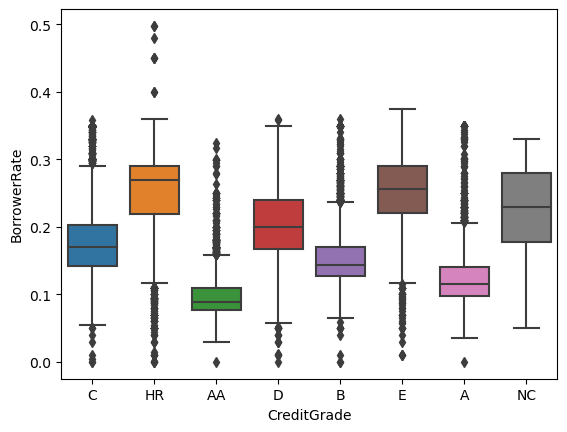

In [20]:
import seaborn as sns
sns.boxplot(df_selected["CreditGrade"], df_selected["BorrowerRate"])

In [21]:
conditions = [(df_selected["BorrowerRate"]>0.0774)&(df_selected["BorrowerRate"]<=0.1030), 
              (df_selected["BorrowerRate"]>0.1030)&(df_selected["BorrowerRate"]<=0.1340),
              (df_selected["BorrowerRate"]>0.1340)&(df_selected["BorrowerRate"]<=0.157000),
              (df_selected["BorrowerRate"]>0.157000)&(df_selected["BorrowerRate"]<=0.184500),
              (df_selected["BorrowerRate"]>0.184500)&(df_selected["BorrowerRate"]<=0.230000),
              (df_selected["BorrowerRate"]>0.230000)&(df_selected["BorrowerRate"]<=0.255000),
              (df_selected["BorrowerRate"]>0.255000)&(df_selected["BorrowerRate"]<=0.290000)
             ]
choices = ["AA", "A", "B", "C", "D", "E", "HR"]

df_selected["CreditGrade"] = np.select(conditions, choices, default="NC")

In [22]:
df_selected["CreditGrade"].value_counts()

D     19813
NC    18772
C     15441
A     14987
B     13943
HR    12737
AA     9591
E      8653
Name: CreditGrade, dtype: int64

In [23]:
df_selected

,CreditGrade,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,LoanOriginalAmount,StatedMonthlyIncome,Recommendations,LoanStatus
0,C,36,0.16516,0.1580,4.0,6.0,Self-employed,True,True,9425,3083.333333,0,0
1,AA,36,0.12016,0.0920,6.0,7.0,Employed,False,False,10000,6125.000000,0,0
2,HR,36,0.28269,0.2750,4.0,6.0,Other,False,True,3001,2083.333333,0,0
3,AA,36,0.12528,0.0974,6.0,9.0,Employed,True,False,10000,2875.000000,0,0
4,D,36,0.24614,0.2085,3.0,4.0,Employed,True,False,15000,9583.333333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,D,36,0.22354,0.1864,4.0,5.0,Employed,True,False,10000,4333.333333,0,0
113933,A,36,0.13220,0.1110,6.0,8.0,Employed,True,False,2000,8041.666667,0,0
113934,D,60,0.23984,0.2150,3.0,3.0,Employed,True,False,10000,2875.000000,0,0
113935,HR,60,0.28408,0.2605,4.0,5.0,Full-time,True,False,15000,3875.000000,0,0


# Encoding

In [24]:
df_selected["CreditGrade"].replace({"NC":0, "HR":1, "E":2, "D":3, "C":4, "B":5, "A":6, "AA":7}, inplace=True)

In [25]:
df_selected

,CreditGrade,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,LoanOriginalAmount,StatedMonthlyIncome,Recommendations,LoanStatus
0,4,36,0.16516,0.1580,4.0,6.0,Self-employed,True,True,9425,3083.333333,0,0
1,7,36,0.12016,0.0920,6.0,7.0,Employed,False,False,10000,6125.000000,0,0
2,1,36,0.28269,0.2750,4.0,6.0,Other,False,True,3001,2083.333333,0,0
3,7,36,0.12528,0.0974,6.0,9.0,Employed,True,False,10000,2875.000000,0,0
4,3,36,0.24614,0.2085,3.0,4.0,Employed,True,False,15000,9583.333333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,36,0.22354,0.1864,4.0,5.0,Employed,True,False,10000,4333.333333,0,0
113933,6,36,0.13220,0.1110,6.0,8.0,Employed,True,False,2000,8041.666667,0,0
113934,3,60,0.23984,0.2150,3.0,3.0,Employed,True,False,10000,2875.000000,0,0
113935,1,60,0.28408,0.2605,4.0,5.0,Full-time,True,False,15000,3875.000000,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df_selected = df_selected.apply(le.fit_transform)
df_selected

,CreditGrade,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,LoanOriginalAmount,StatedMonthlyIncome,Recommendations,LoanStatus
0,4,1,2474,908,3,5,6,1,1,1454,3750,0,0
1,7,1,1252,312,5,6,0,0,0,1523,9339,0,0
2,1,1,5381,1858,3,5,3,0,1,366,1775,0,0
3,7,1,1390,358,5,8,0,1,0,1523,3299,0,0
4,3,1,4624,1341,2,3,0,1,0,2084,12081,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,1,4039,1157,3,4,0,1,0,1523,6447,0,0
113933,6,1,1578,482,5,7,0,1,0,152,11295,0,0
113934,3,2,4468,1392,2,2,0,1,0,1523,3299,0,0
113935,1,2,5412,1761,3,4,1,1,0,2084,5503,0,0


2023-09-30 21:30:46,540 - INFO     - Executing shutdown due to inactivity...
2023-09-30 21:30:58,821 - INFO     - Executing shutdown...
